In [1]:
import tensorflow as tf
import keras
from keras import datasets

In [2]:
help(datasets)

Help on package keras.datasets in keras:

NAME
    keras.datasets - Small NumPy datasets for debugging/testing.

PACKAGE CONTENTS
    boston_housing
    cifar
    cifar10
    cifar100
    fashion_mnist
    imdb
    mnist
    reuters

FILE
    /usr/local/lib/python3.7/dist-packages/keras/datasets/__init__.py




In [3]:
import matplotlib.pyplot as plt
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

11501568/11490434 [==============================] - 0s 0us/step


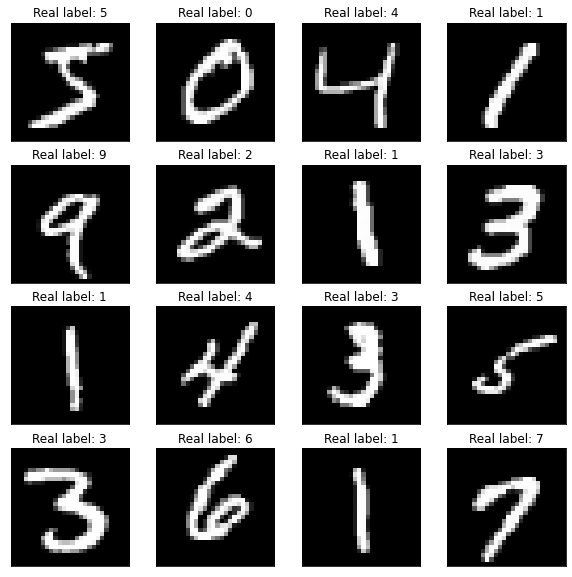

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

show_mnist(x_train, y_train)

# преобразуем изображения к нужному виду
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))

In [8]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

In [5]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(x_train.shape[1],), activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(10)) 

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) 
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


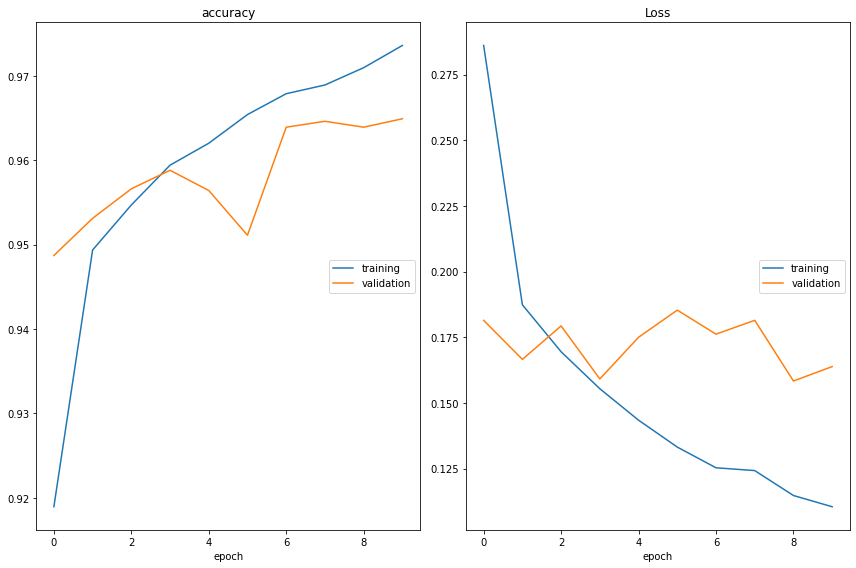

accuracy
	training         	 (min:    0.919, max:    0.974, cur:    0.974)
	validation       	 (min:    0.949, max:    0.965, cur:    0.965)
Loss
	training         	 (min:    0.110, max:    0.286, cur:    0.110)
	validation       	 (min:    0.158, max:    0.185, cur:    0.164)
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1105 - accuracy: 0.9736 - val_loss: 0.1638 - val_accuracy: 0.9649


In [9]:
callbacks = [PlotLossesCallback()]

history = model.fit(x=x_train, y=y_train, 
                    validation_data=[x_test, y_test],
                    batch_size=32, epochs=10,
                    callbacks = callbacks)

In [10]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.1638 - accuracy: 0.9649
Accuracy of restored model 96.49%


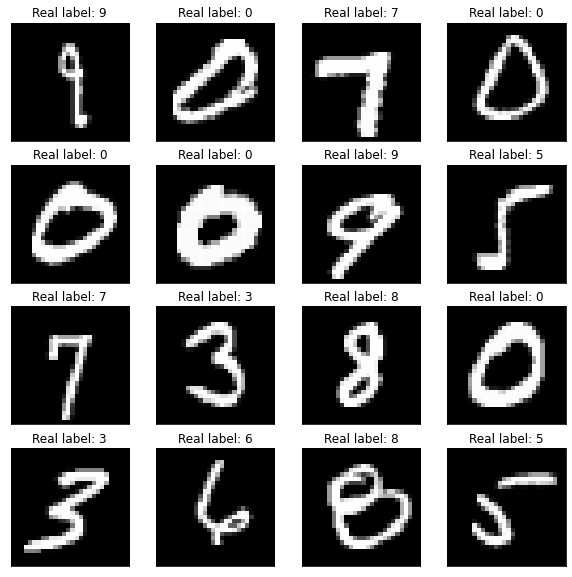

In [11]:
import numpy as np
predicted_labels = (model.predict(x_test) > 0.5).astype("int32")
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs])